#  Iris Dataset Classification with Multiple Algorithms 
                                       

### Objective
The objective of this project is to develop robust classification models to classify species of the Iris flower using various machine learning algorithms, including Logistic Regression, Deep Learning, and K-Nearest Neighbors (K-NN). The project involves thorough exploratory data analysis, preprocessing, model training, evaluation, and result interpretation.



In [137]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split



## Data Loading and Preparation

In [138]:
# Loading the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [139]:
# Converting to DataFrame for easier data manipulation and visualization
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                  columns=iris['feature_names'] + ['target'])

In [140]:
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [142]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### Checking for Null Values

In [143]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

NO Null values present 

In [144]:
# Mapping target variable to their respective iris species for visualisation

value_to_category = {0: "iris_setosa", 1: "iris_versicolor", 2: "iris_virginica"}

# Create a new categorical variable based on the mapping dictionary
df['species'] = df['target'].map(value_to_category)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,iris_setosa
1,4.9,3.0,1.4,0.2,0.0,iris_setosa
2,4.7,3.2,1.3,0.2,0.0,iris_setosa
3,4.6,3.1,1.5,0.2,0.0,iris_setosa
4,5.0,3.6,1.4,0.2,0.0,iris_setosa


## Exploratory Data Analysis

### Univariate Analysis

### BoxPLots

<Axes: xlabel='petal length (cm)', ylabel='species'>

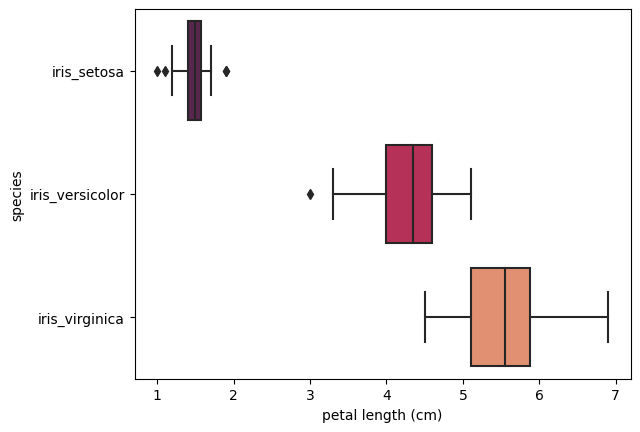

In [145]:
sns.boxplot(data=df, x="petal length (cm)", y="species", palette = "rocket")

<Axes: xlabel='petal width (cm)', ylabel='species'>

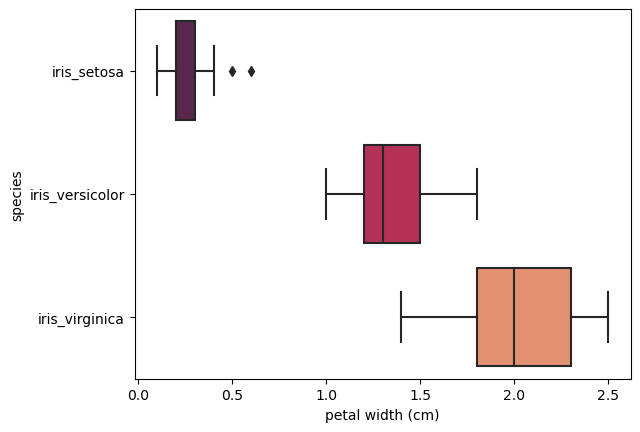

In [146]:
sns.boxplot(data=df, x="petal width (cm)", y="species", palette = "rocket")

<Axes: xlabel='sepal length (cm)', ylabel='species'>

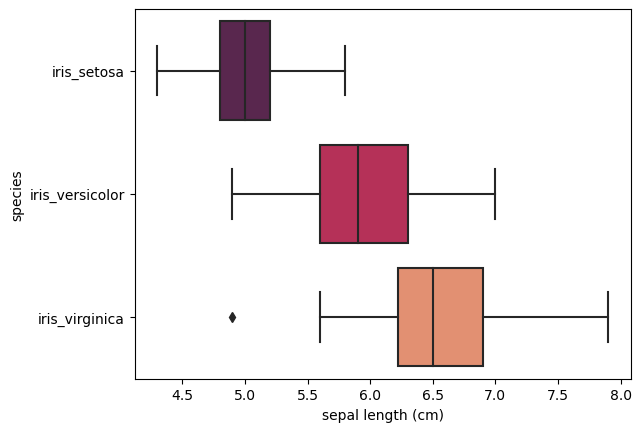

In [147]:
sns.boxplot(data=df, x="sepal length (cm)", y="species", palette = "rocket")

<Axes: xlabel='sepal width (cm)', ylabel='species'>

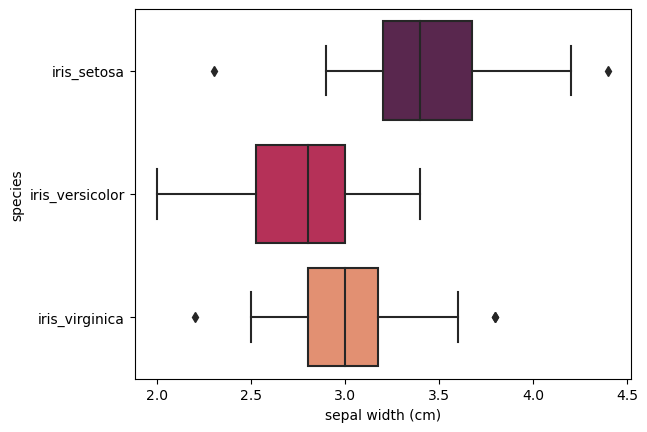

In [148]:
sns.boxplot(data=df, x="sepal width (cm)", y="species", palette = "rocket")

* Outliers are few and can be neglected
* Clear Differentiation of Iris species in all variables suggest some deterministic traits of the dataset

### HistPlots

<Axes: xlabel='petal length (cm)', ylabel='Count'>

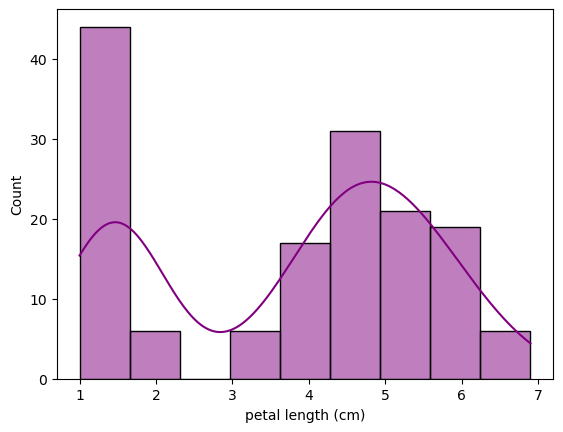

In [149]:
sns.histplot(data=df, x="petal length (cm)", kde=True, color = 'purple')

<Axes: xlabel='petal width (cm)', ylabel='Count'>

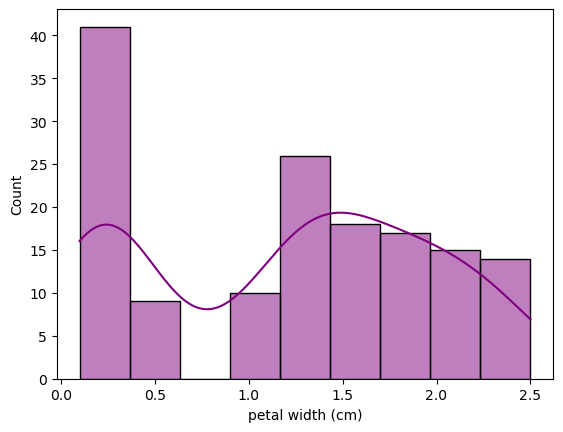

In [150]:
sns.histplot(data=df, x="petal width (cm)", kde=True, color = "purple")

<Axes: xlabel='sepal length (cm)', ylabel='Count'>

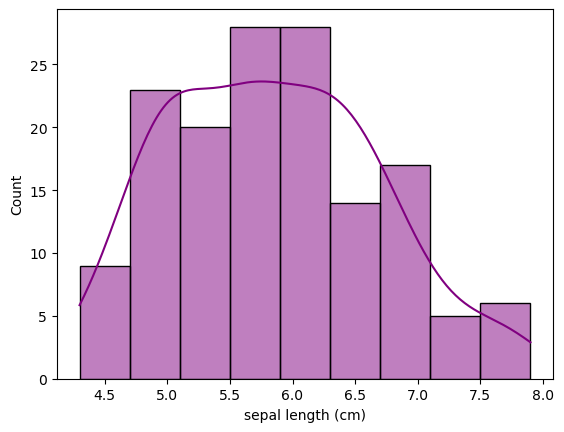

In [151]:
sns.histplot(data=df, x="sepal length (cm)", kde=True, color = "purple")

<Axes: xlabel='sepal width (cm)', ylabel='Count'>

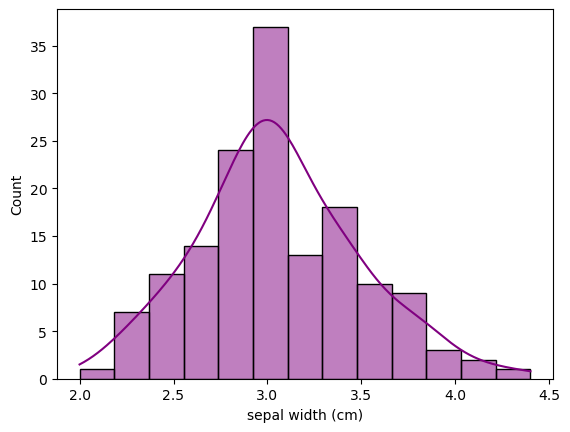

In [152]:
sns.histplot(data=df, x="sepal width (cm)", kde=True, color = "purple")

### Bivariate Analysis

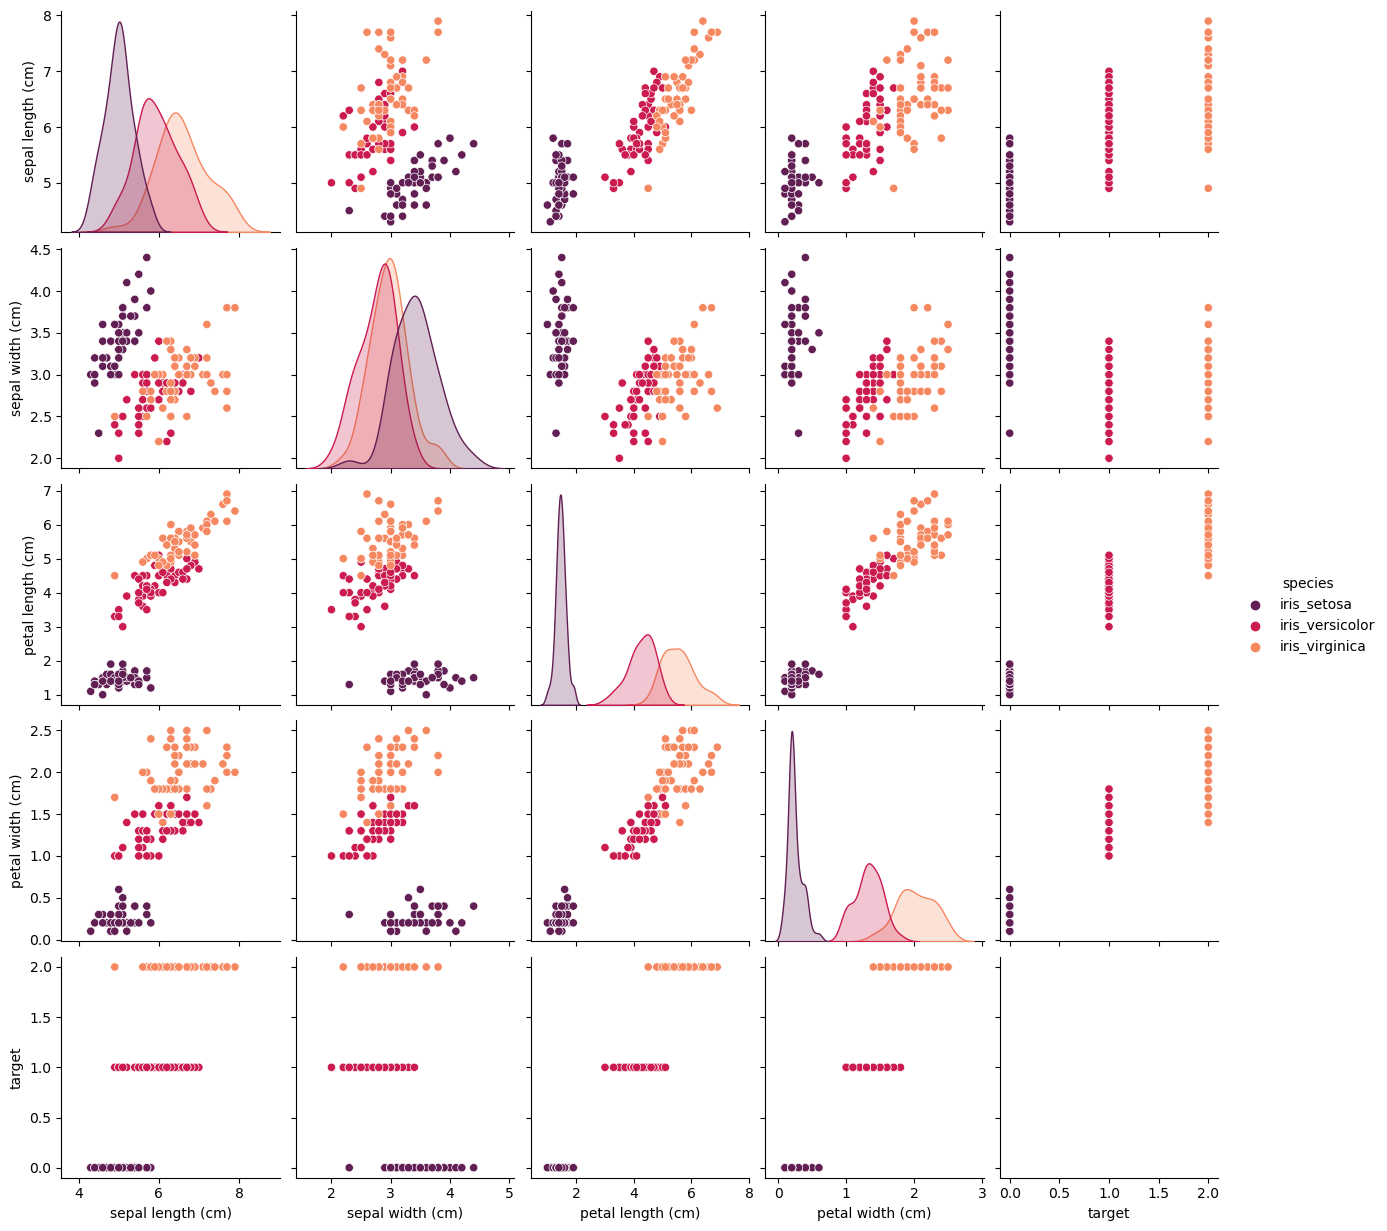

In [153]:

# Visualization: Pairplot to visualize the data distribution with color-coded targets
sns.pairplot(df, hue="species", palette="rocket")
plt.show()


### Most of the datapoint are clearly separable even in the bivariate analysis suggesting a model with good accuracy to be possible

In [154]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

## Training

In [155]:
# Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [156]:
X_train.shape

(120, 4)

In [157]:
# Data standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Model 1 -- Logistic Regression

In [158]:
# Logistic Regression model
lr_model = LogisticRegression(random_state=42)
history = lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

## Model 2 -- KNN

In [159]:
# K-Nearest Neighbors model
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)


## Model 3 -- Neural Networks

In [168]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report
from tensorflow.keras.utils import to_categorical

In [169]:
# Deep Learning model setup
dl_model = Sequential([
    Dense(6, input_shape=(4,), activation='relu'),
    
    Dense(3, activation='softmax')
])
dl_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [170]:
# Train the Deep Learning model
history = dl_model.fit(X_train, y_train, epochs=100, batch_size=5, validation_split=0.2)

Epoch 1/100
20/20 [==============================] - 2s 35ms/step - loss: 1.0608 - accuracy: 0.2708 - val_loss: 1.0158 - val_accuracy: 0.3333
Epoch 2/100
20/20 [==============================] - 0s 9ms/step - loss: 0.9667 - accuracy: 0.4896 - val_loss: 0.9377 - val_accuracy: 0.5833
Epoch 3/100
20/20 [==============================] - 0s 9ms/step - loss: 0.8849 - accuracy: 0.6458 - val_loss: 0.8736 - val_accuracy: 0.6667
Epoch 4/100
20/20 [==============================] - 0s 12ms/step - loss: 0.8195 - accuracy: 0.6771 - val_loss: 0.8252 - val_accuracy: 0.8333
Epoch 5/100
20/20 [==============================] - 0s 9ms/step - loss: 0.7699 - accuracy: 0.7188 - val_loss: 0.7823 - val_accuracy: 0.8333
Epoch 6/100
20/20 [==============================] - 0s 9ms/step - loss: 0.7258 - accuracy: 0.7708 - val_loss: 0.7487 - val_accuracy: 0.9167
Epoch 7/100
20/20 [==============================] - 0s 10ms/step - loss: 0.6912 - accuracy: 0.7708 - val_loss: 0.7163 - val_accuracy: 0.9167
Epoch 8/10

In [171]:
# Deep Learning predictions
dl_predictions = np.argmax(dl_model.predict(X_test), axis=-1)

1/1 [==============================] - 0s 140ms/step


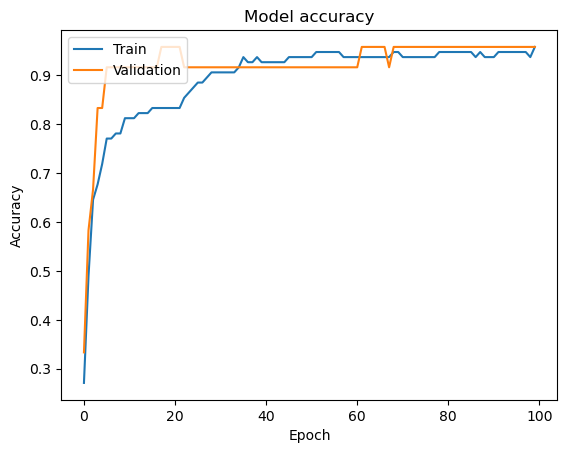

In [172]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

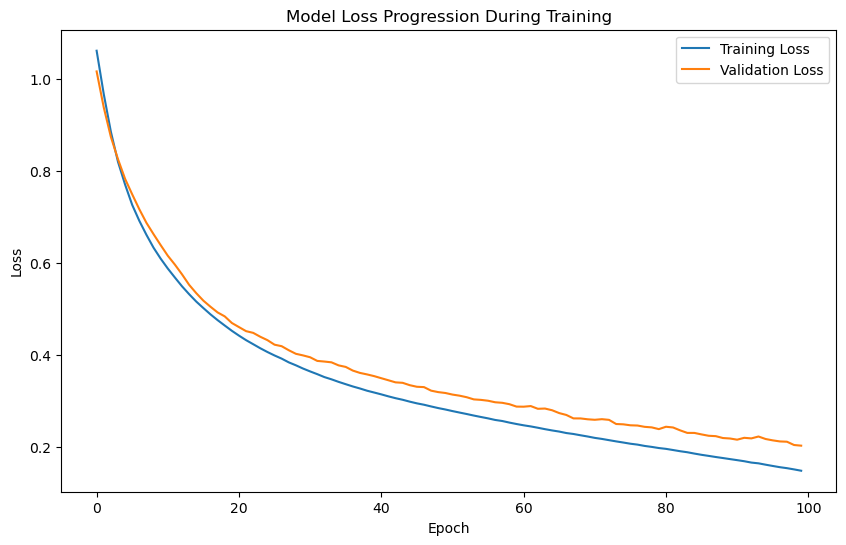

In [173]:
# Plotting the loss for the Deep Learning model
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Progression During Training')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [174]:
# Predictions

loss, accuracy = dl_model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

1/1 [==============================] - 0s 75ms/step - loss: 0.1196 - accuracy: 1.0000
Test Accuracy: 1.00


## Classification Report

In [175]:

print("Logistic Regression Classification Report:\n", classification_report(y_test, lr_predictions))
print("K-NN Classification Report:\n", classification_report(y_test, knn_predictions))
print("Deep Learning Classification Report:\n", classification_report(y_test, dl_predictions))

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

K-NN Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Deep Learning Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1      